In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pickle


In [2]:
def extract_form_log(fn):
    lines=open(fn,'r').readlines()
    start=np.where([('Step' in l) for l in lines])[-1][0]
    data={keyi.lower(): []  for keyi in lines[start].split()}
    for l in lines[start+1:]:
        ls=l.split()
        if ls[0].isdigit():
            for i, key in enumerate(data.keys()):
                data[key].append(float(ls[i]))
        else:
            break
    for key in data.keys():
        data[key]=np.array(data[key])
    return data

In [3]:
sims=dict()
for f in glob.glob('*_*/log.lammps'):
    try:
        sims[f.replace('/log.lammps','')]=extract_form_log(f)
    except:
        pass

with open('1-bulk.pickle', 'wb') as handle:
    pickle.dump(sims, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('1-bulk.pickle', 'rb') as handle:
    sims = pickle.load(handle)

### Volume for different pressures

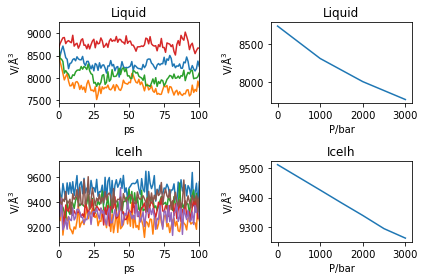

In [10]:
NIGNORE=300
plt.subplot(221)
plt.title('Liquid')
vol_liquid=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceIh_','').replace('bar',''))
    if 'Liquid' in key:
        sim=sims[key]
        vol_liquid.append([p,np.mean(sim['volume'][NIGNORE:])])
        plt.plot(sim['step']*2/1000,sim['volume'],label=key)
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
plt.xlim([0,100])
plt.subplot(222)
plt.title('Liquid')
vol_liquid=np.array(vol_liquid)
vol_liquid=vol_liquid[np.argsort(vol_liquid[:,0])]
plt.plot(vol_liquid[:,0],vol_liquid[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.subplot(223)
plt.title('IceIh')
vol_ice=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceIh_','').replace('bar',''))
    if 'IceIh' in key:
        sim=sims[key]
        vol_ice.append([p,np.mean(sim['volume'][NIGNORE:])])
        plt.plot(sim['step']*2/1000,sim['volume'],label=key)
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
plt.xlim([0,100])
plt.subplot(224)
plt.title('IceIh')
vol_ice=np.array(vol_ice)
vol_ice=vol_ice[np.argsort(vol_ice[:,0])]
plt.plot(vol_ice[:,0],vol_ice[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.tight_layout()

### Box sides for different pressures

/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


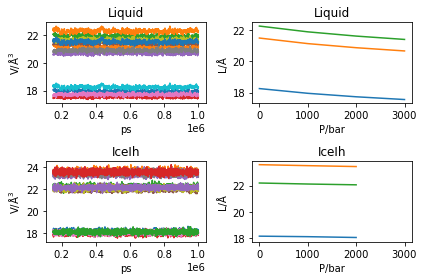

In [5]:
NIGNORE=300
plt.subplot(221)
plt.title('Liquid')
box_liquid=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceIh_','').replace('bar',''))
    if 'Liquid' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:],sim['lx'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:],sim['ly'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:],sim['lz'][NIGNORE:])

        box_liquid.append([p,np.mean(sim['lx'][NIGNORE:]),np.mean(sim['ly'][NIGNORE:]),np.mean(sim['lz'][NIGNORE:])])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(222)
plt.title('Liquid')
box_liquid=np.array(box_liquid)
box_liquid=box_liquid[np.argsort(box_liquid[:,0])]
plt.plot(box_liquid[:,0],box_liquid[:,1:])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')


plt.subplot(223)
plt.title('IceIh')
box_IceIh=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceIh_','').replace('bar',''))
    if 'IceIh' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:],sim['lx'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:],sim['ly'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:],sim['lz'][NIGNORE:])

        box_IceIh.append([p,np.mean(sim['lx'][NIGNORE:]),np.mean(sim['ly'][NIGNORE:]),np.mean(sim['lz'][NIGNORE:])])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(224)
plt.title('IceIh')
box_IceIh=np.array(box_IceIh)
box_IceIh=box_IceIh[np.argsort(box_IceIh[:,0])]
plt.plot(box_IceIh[:,0],box_IceIh[:,1:])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')

plt.tight_layout()


In [6]:
print('Liquid')
for val in box_liquid:
    print('Pressure: ',val[0],'bar, lx:',val[1],'Å, ly:',val[2],'Å, lz:',val[3],'Å')
print()
print('IceIh')
for val in box_IceIh:
    print('Pressure: ',val[0],'bar, lx:',val[1],'Å, ly:',val[2],'Å, lz:',val[3],'Å')        

Liquid
Pressure:  0.0 bar, lx: 18.252478479129923 Å, ly: 21.49900871193416 Å, lz: 22.267981119341563 Å
Pressure:  1000.0 bar, lx: 17.94881680658436 Å, ly: 21.141335341563785 Å, lz: 21.89751457436802 Å
Pressure:  2000.0 bar, lx: 17.725477870664314 Å, ly: 20.878271580834802 Å, lz: 21.625041590241032 Å
Pressure:  3000.0 bar, lx: 17.54897024691358 Å, ly: 20.670368902998238 Å, lz: 21.409702699000587 Å

IceIh
Pressure:  0.0 bar, lx: 18.15207151675485 Å, ly: 23.595240323927104 Å, lz: 22.19945054673721 Å
Pressure:  1000.0 bar, lx: 18.113694553204 Å, ly: 23.520318420928863 Å, lz: 22.121930219870663 Å
Pressure:  2000.0 bar, lx: 18.051791406231626 Å, ly: 23.452205398001176 Å, lz: 22.061808240446798 Å
Pressure:  2500.0 bar, lx: nan Å, ly: nan Å, lz: nan Å
Pressure:  3000.0 bar, lx: 18.002959078777188 Å, ly: 23.38199967666079 Å, lz: 21.987963681363905 Å


In [7]:
with open('avg_IceIh_box.dat','w') as fp_out:
    for val in box_IceIh:
        fp_out.write('{:8}{:7.5}{:7.5}{:7.5}\n'.format(val[0],val[1],val[2],val[3]))
!cat avg_IceIh_box.dat

     0.0 18.152 23.595 22.199
  1000.0 18.114  23.52 22.122
  2000.0 18.052 23.452 22.062
  2500.0    nan    nan    nan
  3000.0 18.003 23.382 21.988
